<a href="https://colab.research.google.com/github/jraval/Unit2BuildProjectLambda/blob/main/Unit2BuildDSPT10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Lambda School Data Science

Unit 2, Sprint 3, Module 1

Define ML problems
You will use your portfolio project dataset for all assignments this sprint.

Assignment
Complete these tasks for your project, and document your decisions.

[ ] Choose your target. Which column in your tabular dataset will you predict?
[ ] Is your problem regression or classification?
[ ] How is your target distributed?
Classification: How many classes? Are the classes imbalanced?
Regression: Is the target right-skewed? If so, you may want to log transform the target.
[ ] Choose your evaluation metric(s).
Classification: Is your majority class frequency >= 50% and < 70% ? If so, you can just use accuracy if you want. Outside that range, accuracy could be misleading. What evaluation metric will you choose, in addition to or instead of accuracy?
Regression: Will you use mean absolute error, root mean squared error, R^2, or other regression metrics?
[ ] Choose which observations you will use to train, validate, and test your model.
Are some observations outliers? Will you exclude them?
Will you do a random split or a time-based split?
[ ] Begin to clean and explore your data.
[ ] Begin to choose which features, if any, to exclude. Would some features "leak" future information?
If you haven't found a dataset yet, do that today. Review requirements for your portfolio project and choose your dataset.

Some students worry, what if my model isn't “good”? Then, produce a detailed tribute to your wrongness. That is science!

My target is the incidence of falls in the elderly.  My problem is classification although there are continuous features.  The classes are imbalanced.  I will probably choose ROC/AUC score.  There are some outliers.  

In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [484]:
import os
print(os.getcwd())

/content


In [485]:
print(os.listdir(os.getcwd()))

['.config', 'KaggleFallDetection_2_8_21 (5).csv', 'KaggleFallDetection_2_8_21 (1).csv', 'KaggleFallDetection_2_8_21 (3).csv', 'KaggleFallDetection_2_8_21 (2).csv', 'KaggleFallDetection_2_8_21 (4).csv', 'KaggleFallDetection_2_8_21.csv', 'sample_data']


In [449]:
from google.colab import files
uploaded = files.upload()

Saving KaggleFallDetection_2_8_21.csv to KaggleFallDetection_2_8_21 (5).csv


In [486]:
data = pd.read_csv("KaggleFallDetection_2_8_21.csv") 
pd.options.display.max_columns = None

In [487]:
!pip install category_encoders==2.*

In [488]:
data

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809
...,...,...,...,...,...,...,...
16377,4,9280.68,11417.00,-3021.64,36,156,654
16378,3,8479.69,9455.54,-2932.85,17,138,554
16379,2,8872.53,27449.90,-2870.00,33,156,1364
16380,4,7738.99,26466.40,-2920.24,97,156,1521


In [489]:
data.describe(include='all')

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
count,16382.000000,16382.000000,1.638200e+04,1.638200e+04,16382.000000,16382.000000,16382.000000
mean,2.361494,10936.842478,7.527198e+04,-5.621125e+03,58.251068,211.536992,2894.341472
std,1.739195,5261.463601,1.275022e+05,1.082209e+05,48.292926,129.949521,3825.927830
min,0.000000,1954.230000,4.222420e+01,-1.262600e+07,0.000000,33.000000,5.000000
25%,0.000000,7263.685000,9.941170e+03,-5.630000e+03,25.000000,119.000000,587.000000
50%,3.000000,9769.355000,3.118920e+04,-3.361275e+03,44.000000,180.000000,1581.000000
75%,4.000000,13481.650000,8.076145e+04,-2.150000e+03,78.000000,271.000000,3539.000000
max,5.000000,50895.500000,2.426140e+06,1.410000e+06,533.000000,986.000000,52210.000000


### Choose your target 

Which column in your tabular dataset will you predict?

I picked incidence of falls as my target because that is what the study was measuring, can we predict falling?

In [490]:
df = data
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION
0,3,4722.92,4019.64,-1600.00,13,79,317
1,2,4059.12,2191.03,-1146.08,20,54,165
2,2,4773.56,2787.99,-1263.38,46,67,224
3,4,8271.27,9545.98,-2848.93,26,138,554
4,4,7102.16,14148.80,-2381.15,85,120,809


In [491]:
'''
def replace_fall():
  if x == 3:
    x = 1
  else:
    x = 0
'''

'\ndef replace_fall():\n  if x == 3:\n    x = 1\n  else:\n    x = 0\n'

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


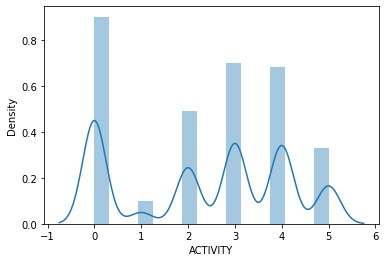

In [492]:
import seaborn as sns #There is no clear majority
import matplotlib.pyplot as plt
sns.distplot(df['ACTIVITY']);

In [493]:
y = df['ACTIVITY']
y.nunique()
y.value_counts(normalize=True)

0    0.281284
3    0.219021
4    0.213283
2    0.152729
5    0.103040
1    0.030643
Name: ACTIVITY, dtype: float64

0- Standing
1- Walking
2- Sitting
3- Falling
4- Cramps
5- Running

In [494]:
df['ACTIVITY'].describe() #Multiclass Target

count    16382.000000
mean         2.361494
std          1.739195
min          0.000000
25%          0.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: ACTIVITY, dtype: float64

In [495]:
df['FALLS'] = df['ACTIVITY']  #I'm expecting overfitting if I use these features because they were part of the same column, these features are essentially tied together.
df['STANDING'] = df['ACTIVITY']
df['WALKING'] = df['ACTIVITY']
df['SITTING'] = df['ACTIVITY']
df['CRAMPS'] = df['ACTIVITY']
df['RUNNING'] = df['ACTIVITY']

In [496]:
df = df.replace({'FALLS':{3:1, 1:0, 2:0, 4:0, 5:0}})
df = df.replace({'STANDING':{0:1, 1:0, 2:0, 3:0, 4:0, 5:0}})
df = df.replace({'WALKING':{2:0, 3:0, 4:0, 5:0}})
df = df.replace({'SITTING':{1:0, 2:1, 3:0, 4:0, 5:0,}})
df = df.replace({'CRAMPS':{1:0, 2:0, 3:0, 4:1, 5:0}})
df = df.replace({'RUNNING':{1:0, 2:0, 3:0, 4:0, 5:1}})

(13.0, 0.0)

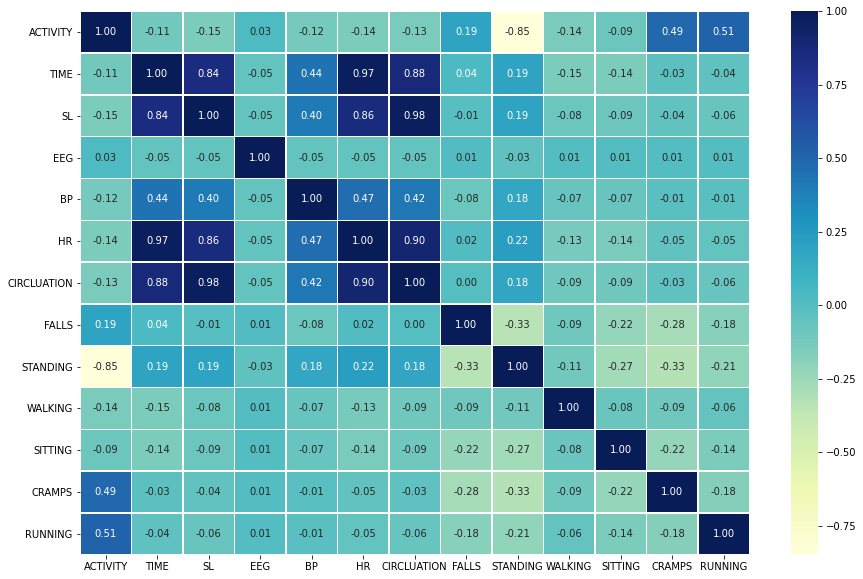

In [572]:
import seaborn as sns#EDA - determine which columns to drop, there was overfitting in train set

corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

I may have to drop circulation and time, there may be overfitting there.  I am going to drop the engineered features as you will see below.

In [497]:
y = df['FALLS']
y.nunique()
y.value_counts(normalize=True)

0    0.780979
1    0.219021
Name: FALLS, dtype: float64

In [498]:
df.sample(20)

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALLS,STANDING,WALKING,SITTING,CRAMPS,RUNNING
14302,2,8560.98,11965.50,-2476.93,78,128,693,0,0,0,1,0,0
10794,4,8652.28,30045.30,-2068.16,27,132,1513,0,0,0,0,1,0
6662,4,13540.00,96340.20,-5744.82,55,294,4249,0,0,0,0,1,0
14619,2,4090.34,2272.34,-1129.58,19,54,165,0,0,0,1,0,0
2089,3,9351.05,25740.00,-3165.06,25,174,1415,1,0,0,0,0,0
8386,0,12179.10,65233.00,-6074.00,31,224,2192,0,1,0,0,0,0
4288,4,9863.19,32932.10,-3495.00,80,176,1922,0,0,0,0,1,0
1761,3,11182.70,49091.10,-5140.00,20,216,2677,1,0,0,0,0,0
13486,5,9387.99,30218.50,-3296.09,114,171,1747,0,0,0,0,0,1
9122,0,12017.90,70093.00,-5112.00,143,279,3451,0,1,0,0,0,0


In [499]:
#df.apply(np.sqrt)

In [500]:
#df['FALLS'] = df.loc[df['ACTIVITY'].isin([3])]=1
#df['FALLS'] = df.loc[df['ACTIVITY'].isin([0,1,2,4,5])]=0

In [501]:
df.isna().sum().sort_values()

ACTIVITY       0
TIME           0
SL             0
EEG            0
BP             0
HR             0
CIRCLUATION    0
FALLS          0
STANDING       0
WALKING        0
SITTING        0
CRAMPS         0
RUNNING        0
dtype: int64

In [502]:
df.head()

,ACTIVITY,TIME,SL,EEG,BP,HR,CIRCLUATION,FALLS,STANDING,WALKING,SITTING,CRAMPS,RUNNING
0,3,4722.92,4019.64,-1600.00,13,79,317,1,0,0,0,0,0
1,2,4059.12,2191.03,-1146.08,20,54,165,0,0,0,1,0,0
2,2,4773.56,2787.99,-1263.38,46,67,224,0,0,0,1,0,0
3,4,8271.27,9545.98,-2848.93,26,138,554,0,0,0,0,1,0
4,4,7102.16,14148.80,-2381.15,85,120,809,0,0,0,0,1,0


In [503]:
df=df.fillna('Missing')

In [504]:
target = 'FALLS'

In [505]:
build_df = df

In [506]:
build_df = build_df.drop(columns=['ACTIVITY', 'WALKING', 'SITTING', 'CRAMPS', 'RUNNING', 'STANDING', 'TIME'])

In [507]:
%matplotlib inline
import category_encoders as ce
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [508]:
# Split train into train & test. Make val the same size as test.
target = 'FALLS'
train, test = train_test_split(build_df, test_size=0.2,  
                              stratify=build_df[target], random_state=42)

In [509]:
train, val = train_test_split(train, test_size=len(test),  
                              stratify=train[target], random_state=42)

In [510]:
train.shape, val.shape, test.shape

((9828, 6), (3277, 6), (3277, 6))

In [511]:
# Arrange data into X features matrix and y target vector
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test.drop(columns=target)
y_test = test[target]


In [512]:
X_train.columns

Index(['SL', 'EEG', 'BP', 'HR', 'CIRCLUATION'], dtype='object')

In [513]:
pipeline = make_pipeline(
    ce.OneHotEncoder(), 
    SimpleImputer(strategy='mean'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

In [564]:
model = make_pipeline(
    ce.OneHotEncoder(),
    SimpleImputer(strategy='median'),  
    DecisionTreeClassifier(max_depth=11)
)

In [533]:
pipeline.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('randomforestclassifier',
                 RandomForestClassif...ap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=

In [565]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=[], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=False,
                               verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=11,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, mi

In [571]:
print('Train Accuracy', model.score(X_train, y_train))

Train Accuracy 0.894993894993895


In [570]:
print('Val Accuracy', model.score(X_val, y_val))

Val Accuracy 0.8309429356118401


In [569]:
print('Test Accuracy', model.score(X_test, y_test))

Test Accuracy 0.8275862068965517


##Baseline

In [539]:
y.value_counts(normalize=True).max()

0.7809791234281529

##ROC-AUC Score

In [552]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model.predict_proba(X_val)[:,-1] # probability for the last class 
roc_auc_score(y_val, y_pred_proba)

0.849911177002681

In [553]:
from sklearn.metrics import roc_auc_score
y_pred_proba = pipeline.predict_proba(X_val)[:,-1] # probability for the last class 
roc_auc_score(y_val, y_pred_proba)

0.902375525345577

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


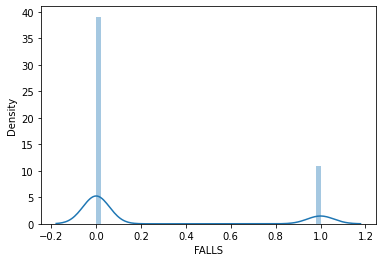

In [524]:
y = df['FALLS']
sns.distplot(y);

In [ ]:
There are outliers and the model is skewed.

In [435]:
print('Train Accuracy', pipeline.score(X_train, y_train))

Train Accuracy 1.0


In [436]:
print('Validation Accuracy', pipeline.score(X_val, y_val))

Validation Accuracy 0.8596277082697589


In [437]:
print('Test Accuracy', pipeline.score(X_test, y_test))

Test Accuracy 0.8642050656087885
